Analyst, Diplomat, Explorer tiplerinden 50'şer tane entry alınarak sample bir veriseti oluşturuldu. Bu veriseti "/home/khan/Desktop/sample_personality_dataset.csv" pathinde bulunmaktadır.

In [10]:
import pandas as pd 

df = pd.read_csv("/home/khan/Desktop/sample_personality_dataset.csv", sep = ';', header = 0) 

In [11]:
df

,entry,typeClass
0,duygularnı belli etmeyen insan modeli bu benim...,analyst
1,ankara'nın en güzel barı ne biliyim bizim için...,analyst
2,ekşi itiraf vallahi dilinin kemiği yok. 50 yaş...,analyst
3,500 lira danışmanlık ücreti isteyen avukat hak...,analyst
4,star trek enterprise yani atılgan gemisi ve mü...,analyst
...,...,...
144,zsuat asfalt çöplük heykel ve cansız manken gi...,explorer
145,zorla flüt çaldıran eğitim sistemi flüt dediği...,explorer
146,bira içen türbanlı kız bu konuyla ilgili basit...,explorer
147,"autocad öğrenmek zorunda olmamama rağmen \""dur...",explorer


Verisetinin class tiplerine göre dağılım

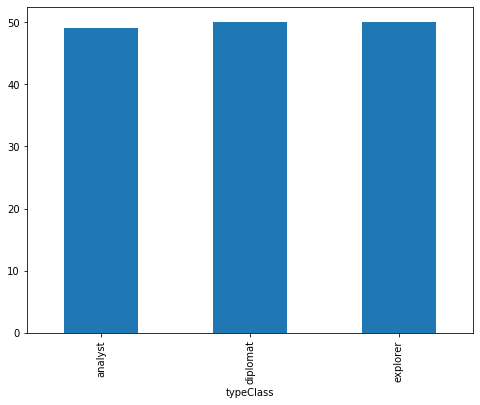

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))

df.groupby('typeClass').typeClass.count().plot.bar(ylim=0)
plt.show()


Türkçe için gerekli olan stop word listesi yoksa indirilir.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
stop_word_list = nltk.corpus.stopwords.words('turkish')

[nltk_data] Downloading package stopwords to /home/khan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stop_word_list

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

Preprocessing işlemleri yapılır. Burada bir tek Türkçe için stop words listesi kullanılarak girdilerden
gereksiz kelimeler atılır. TF-IDF özellik vektörü çıkarılır.

In [16]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_word_list)
features = tfidf.fit_transform(df.entry).toarray()
labels = df.typeClass
features.shape

(149, 232)

(x, y) -> x: döküman (entry) sayısı, y: kelime (vektör) sayısı
TF-IDF kullanarak çıkartılan özellik vektörü

In [20]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

features_df = pd.DataFrame(features)
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231
0,0.000000,0.000000,0.000000,0.000000,0.251775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223778,0.000000,0.000000,0.388886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.229682,0.352900,0.000000,0.000000,0.189925,0.000000,0.000000,0.000000,0.000000,0.137404,0.000000,0.000000,0.000000,0.000000,0.251775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.261323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.261323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213431,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288717,0.000000,0.000000,0.288717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.311131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Multinominal (Birden fazla sınıflı) Naive Bayes modelinin oluşturulması. 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['entry'], df['typeClass'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

test_typeClass = y_test.values
   
predictions = clf.predict(count_vect.transform(X_test))


KeyError: 'entry'